# AUM Data Set

In [2]:
# We are going to use the AUM Data extraction for a bank and create visually soothing data analysis.

In [3]:
# We import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# We import the data extraction file from the required source
ds = pd.read_excel('C:/Users/hp/OneDrive/Desktop/PythonCodes/Data Set/AUM Data Set.xlsx')
ds.head()

,Month,ID,Name,ISIN,Security Name,Security Region,Asset Type,Sub-Asset Type,CCY,Amount,Amount (EUR),Segment,Type,RM,TL,SH,Area
0,Jan,GB003,Stuart Carroll,XS23834,IBM,North American,Bond,Short Term,USD,5749,5059.12,Wealth,Execution Only,Sulaiman B,Sabine A,Syed I,Saxony
1,Jan,GB016,Rebecca Allen,XS23837,HP,North American,Mutual Fund,Fixed Income Funds,USD,49884,43897.92,Private,Advisory,Jithin M,Sabine A,Syed I,Saxony
2,Jan,GB004,Rafael Miller,XS23826,Google,North American,Equity,Foreign Equity,USD,26628,23432.64,Retail,Execution Only,Sulaiman B,Hanadi U,Syed I,Rheinland-Pfalz
3,Jan,GB007,Valeria Perkins,XS23819,Tesla,North American,Mutual Fund,Equity Funds,USD,17240,15171.20,Retail,Execution Only,Jithin M,Hanadi U,Syed I,Saxony
4,Jan,GB002,Carina Thompson,DE23822,Allianz,Europe,Equity,Local Equity,EUR,26805,26805.00,Private,Advisory,Sagar T,Hanadi U,Syed I,Berlin


In [5]:
# We are going to identify the number of columns 
ds.columns

Index(['Month', 'ID', 'Name', 'ISIN', 'Security Name', 'Security Region',
       'Asset Type', 'Sub-Asset Type', 'CCY', 'Amount', 'Amount (EUR)',
       'Segment', 'Type', 'RM', 'TL', 'SH', 'Area'],
      dtype='object')

In [6]:
# For Statistical analysis we are going to display the type of columns and pull out the mean and standard deviation with the following function (this provides data for only valued columns)
ds.describe()

,Amount,Amount (EUR)
count,99.000000,99.000000
mean,24773.414141,18267.226343
std,14241.837408,13720.067096
min,1665.000000,35.064000
25%,13383.500000,5184.520000
50%,24735.000000,16807.000000
75%,37297.000000,26932.575000
max,49884.000000,48999.000000


In [45]:
# Lets first analyze the unquie customers and their AUM (EUR CCY) value. 
data = ds.groupby('ID')['Amount (EUR)'].sum()/1000
print(data)

ID
GB001     68.895520
GB002     57.108868
GB003    169.138740
GB004    125.899370
GB005    127.048100
GB006     86.310164
GB007    138.981390
GB008     10.506176
GB009     51.256880
GB010     55.016720
GB011     70.155024
GB012     96.805124
GB013     80.922250
GB014    120.661916
GB015     57.546076
GB016    224.157720
GB017     87.361450
GB018    111.192960
GB019     29.020640
GB020     40.470320
Name: Amount (EUR), dtype: float64


In [42]:
data1 = ds.groupby('ID')['Amount (EUR)']
print(data1

IndexError: Column(s) Amount (EUR) already selected

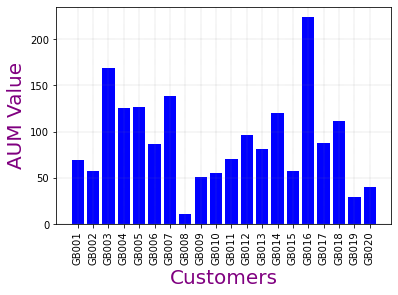

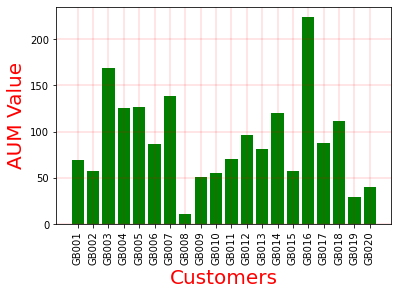

In [33]:
# 1. We are trying to create a bar graph with the Unique Customers and the amount of investment they respectivly hold during the month of January 2021. 
# 2. X asis contains the Unique customers and Y axis will show the value each customer holds for the period. (showing 2 different methologies applied)

plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
X = list(ds['ID'].unique())
X.sort()
Y = list(ds.groupby('ID')['Amount (EUR)'].sum()/1000)
plt.xlabel('Customers', fontsize=20, color='purple')
plt.ylabel('AUM Value', fontsize=20, color='purple')
plot1 = plt.bar(X,Y,color='blue')
plt.xticks(rotation=90)
plt.show()

plt.figsize = (20,10)
data1 = list(ds['ID'].unique())
data1.sort()
data2 = ds.groupby('ID')['Amount (EUR)'].sum()/1000
plt.xticks(rotation=90)
plt.xlabel('Customers', fontsize=20, color='red')
plt.ylabel('AUM Value', fontsize=20, color='red')
plt.bar(data1, data2,color='green')
plt.grid(linestyle='-', linewidth='0.2', color='red')

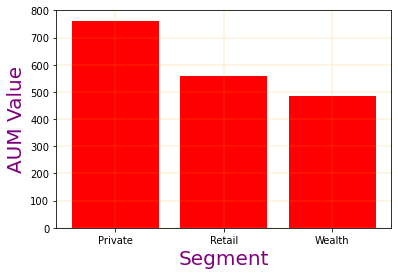

In [38]:
# In the below graph we are trying to identify the value of investments based on the clients segmentation.

A = list(ds['Segment'].unique())
A.sort()
B = list(ds.groupby('Segment')['Amount (EUR)'].sum()/1000)

plt.grid(color = 'orange', linestyle = '-', linewidth = 0.2)
plt.xlabel('Segment', fontsize=20, color='purple')
plt.ylabel('AUM Value', fontsize=20, color='purple')
plot2 = plt.bar(A,B,color='red')
plt.show()

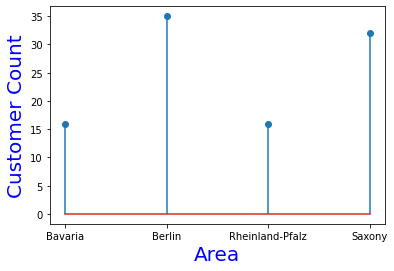

In [31]:
# In the below graph we are trying to identify which region holds the maximum investments. (Focusing on client base region wise)

Z = list(ds['Area'].unique())
Z.sort()
W = list(ds.groupby('Area')['ID'].count())
plt.stem(Z, W)
plt.xlabel('Area', fontsize=20, color='blue')
plt.ylabel('Customer Count', fontsize=20, color='blue')
plt.show()

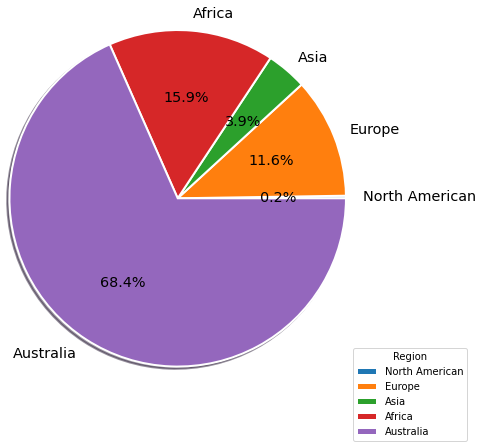

In [147]:
# In the below graph we are trying to identify which region holds the maximum investments. (Focusing on client base region wise)

Pchartdata = ds.groupby('Security Region')['Amount (EUR)'].sum()
plt.rcParams["figure.figsize"] = [7, 7]
plt.rcParams["figure.autolayout"] = True
Pchartlabels =  list(ds['Security Region'].unique())
Pchart = plt.pie(Pchartdata, labels=Pchartlabels, radius = 1.5, shadow = True, autopct='%1.1f%%',wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'},textprops={'size': 'x-large'})
plt.legend(title="Region", bbox_to_anchor=(.95,0), loc="lower right", bbox_transform=plt.gcf().transFigure)
plt.show()